<a href="https://colab.research.google.com/github/YABIGAIL23/SIMULACION-I/blob/main/Flecha_y_cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

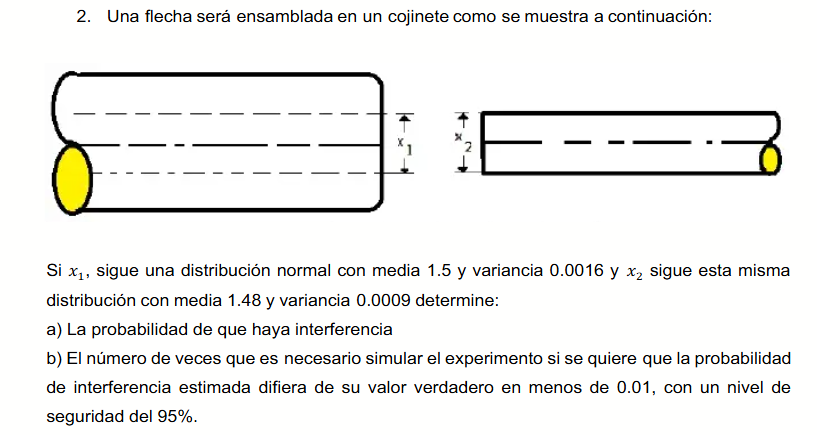

###PASO 1

\begin{equation}
x_1 \thicksim N(1.5,0.04)
\end{equation}
\begin{equation}
x_2 \thicksim N(1.48,0.03)
\end{equation}


###PASO 2
\begin{equation}
x_1 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.04)} \, e^{-\frac{1}{2} \left( \frac{x - 1.5}{0.04} \right)^2}, \quad -\infty < x < \infty
\end{equation}

\begin{equation}
x_2 \thicksim f(x) = \frac{1}{\sqrt{2\pi}(0.003)} \, e^{-\frac{1}{2} \left( \frac{x - 1.48}{0.003} \right)^2}, \quad -\infty < x < \infty
\end{equation}

###PASO 3

**BOX-MULLER**

- Box-Muller convierte dos variables aleatorias uniformes $U_1, U_2$ en dos variables normales independientes
- No requiere aproximaciones numéricas (como tablas de la normal inversa).
- Es exacto si $U_1, U_2$ son verdaderamente uniformes e independientes.

###PASO 4
Condicion de interferencia

\begin{equation}
x_1 \geq x_2
\end{equation}

Buscamos

\begin{equation}
P(x_1 \geq x_2)
\end{equation}

###PASO 5
Se generan 2 numeros aleatorios y se comparan.


In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #Para evitar el uso de Box-Muller

In [ ]:
#Simulación para estimar la probabilidad
def simular_interferencia(n):
    exitos = 0
    for _ in range(n):
        x1 = np.random.normal(mu_x1, sig_x1)
        x2 = np.random.normal(mu_x2, sig_x2)
        if x2 >= x1:
            exitos += 1
    return exitos / n

prob_simulada = simular_interferencia(10000)
print(f"Probabilidad estimada por simulación: {prob_simulada:.4f}")

Probabilidad estimada por simulación: 0.3425


###PASO 6
Repetir M veces el experimento


In [ ]:
#Función para generar muestras
def generar_muestras(M=1000, n=100):
    probabilidades = []
    for _ in range(M):
        prob = simular_interferencia(n)
        probabilidades.append(prob)
    return probabilidades

muestras = generar_muestras(M=1000, n=100)

Agregamos los parametros

In [ ]:
#Parámetros
mu_x1 = 1.5
sig_x1 = np.sqrt(0.0016)  #0.04
mu_x2 = 1.48
sig_x2 = np.sqrt(0.0009)  #0.03

Respondemos al inciso a) La probabilidad de que haya interferencia


In [ ]:
#a) Probabilidad teórica de interferencia (x2 >= x1)
mu_D = mu_x2 - mu_x1
sigma_D = np.sqrt(sig_x1**2 + sig_x2**2)
prob_teorica = 1 - norm.cdf(0, loc=mu_D, scale=sigma_D)
print(f"Probabilidad teórica de interferencia: {prob_teorica:.4f}")

Probabilidad teórica de interferencia: 0.3446


Respondemos al inciso b) El numero de veces que es necesario simular el experimeto, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%

In [ ]:
#b)Número de simulaciones necesarias para error < 0.01 con 95% confianza
z = 1.96
E = 0.01
n_simulaciones = int(np.ceil((z**2 * prob_teorica * (1 - prob_teorica)) / E**2))
print(f"Número de simulaciones necesarias: {n_simulaciones}")

Número de simulaciones necesarias: 8677


###PASO 7
GRAFICA

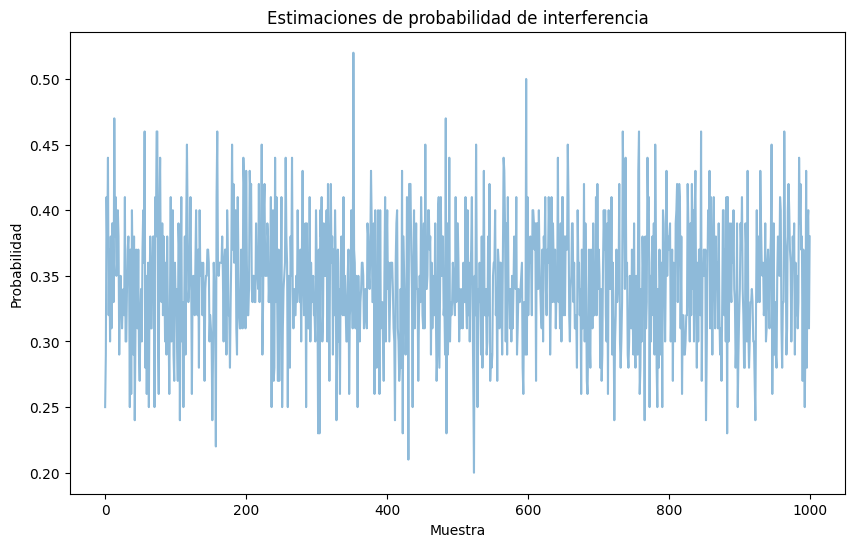

In [ ]:
#graficar las probabilidades
plt.figure(figsize=(10, 6))
plt.plot(muestras, alpha=0.5)
plt.title('Estimaciones de probabilidad de interferencia')
plt.xlabel('Muestra')
plt.ylabel('Probabilidad')
plt.show()